<a href="https://colab.research.google.com/github/Satyam-Kumar-IITBHU/Supervised-Learning-Projects/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection ML Algorithm

We have given the details of credit card transactions and we need to design a machine learning model to classify whether the transaction is legit or fraud.


# Data
The data is taken from Kaggle : 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Note:- Due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

# About the data:
* Data contains 31 columns.
* Data doesn't have any missing values.
* Data is in numeric form.
* Data is highly _imbalanced_

# Evaluation Method
Since the data is highly imbalanced so we are advised to use Area Under the Precision-Recall Curve (AUPRC) for evaluation of our model.

# Importing the tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Importing the data

In [2]:
# Importing the Data
df=pd.read_csv('/content/drive/MyDrive/DataSets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Data Exploration

In [4]:
df.shape

(284807, 31)

In [5]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
275721,166691.0,-1.044093,1.114051,-0.927599,-1.701415,3.033509,3.340914,0.216306,1.346273,-0.935374,...,-0.303955,-1.156317,-0.246345,0.607658,0.553348,0.343242,-0.137262,-0.017704,0.99,0
152072,96816.0,2.053044,-0.122347,-0.918157,0.506171,-0.198652,-1.004312,-0.054116,-0.388980,2.391720,...,-0.068165,0.402121,0.045741,0.055144,0.185575,0.152524,-0.050826,-0.068377,3.30,0
102829,68384.0,1.142599,0.045125,0.356848,1.418830,-0.315704,-0.218297,-0.037609,0.082653,0.557665,...,-0.115621,-0.207081,-0.050232,0.046951,0.599354,-0.308030,0.026263,0.014121,19.20,0
221559,142609.0,-1.866739,-0.315544,-0.091520,-1.788827,0.097861,-2.192246,1.011994,-0.679015,-0.570515,...,0.086718,1.073809,0.369708,0.967240,-0.023592,-0.336568,-0.604714,-0.178497,29.90,0
902,679.0,1.194812,-0.088161,0.487399,0.872865,-0.712495,-0.749223,-0.098641,-0.056473,0.691596,...,-0.238064,-0.618165,0.014581,0.376852,0.395478,0.272410,-0.035685,0.012830,25.39,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Feature Scaling
All the dataset are in the same range except column "Amount". So we are using Standard Scaler for feature scaling.

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [9]:
# sc.fit_transform(df['Amount'])
# df['Amount']=pd.DataFrame(df['Amount'])

In [10]:
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [11]:
df = df.drop(['Time'],axis=1)

In [12]:
# Data doesn't contain any null value
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# Data does contains duplicate values
df.duplicated().any()

True

In [14]:
df = df.drop_duplicates()

In [15]:
# Data is highly Imbalanced
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<Axes: ylabel='count'>

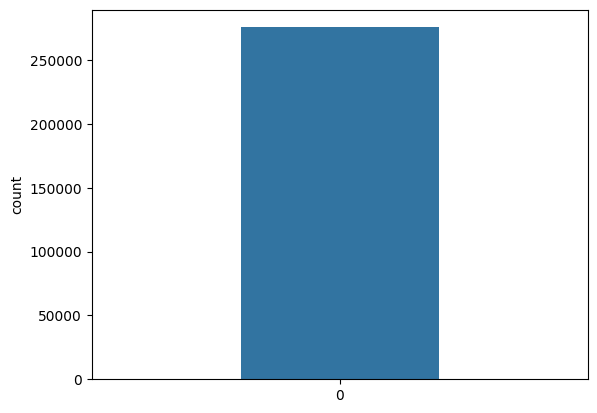

In [16]:
sns.countplot(df['Class'],width=0.4)

In [17]:
x=df.drop('Class',axis=1)
y=df['Class']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

With Imbalanced Dataset


In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [20]:
lr.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=lr.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


0.9992200678359603
0.8870967741935484
0.718954248366013
0.6043956043956044


In [24]:
final_data_imbalanced = pd.DataFrame({'Models':['LR'],
              "Accuracy" : [accuracy_score(y_test,y_pred)*100],
              "Precision" : [precision_score(y_test,y_pred)*100],
              "f1" : [f1_score(y_test,y_pred)*100]
              })

In [25]:
final_data_imbalanced

,Models,Accuracy,Precision,f1
0,LR,99.922007,88.709677,71.895425


<Axes: xlabel='Models', ylabel='Accuracy'>

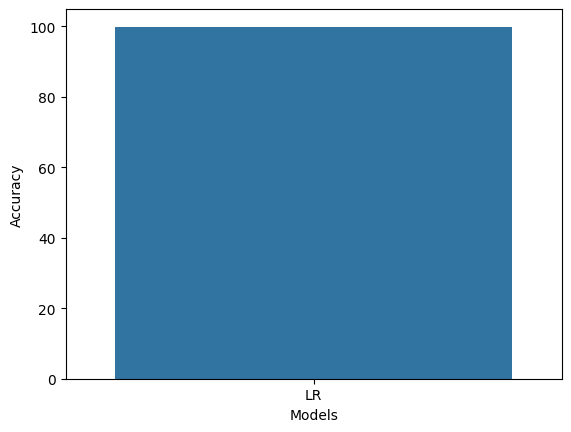

In [ ]:
sns.barplot(x=final_data_imbalanced['Models'],y=final_data_imbalanced['Accuracy'])

# Handling Imbalanced Dataset
1. Under-Sampling
2. Over-Sampling


1. Under-Sampling
  * Logistic Regression (lr)
  * Decision Tree Classifier (dtc)
  * Random Forest Classifier (rfc)

In [26]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [27]:
print(normal.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [28]:
normal=normal.sample(n=473)

In [29]:
new_df = pd.concat([normal,fraud],ignore_index=True)

In [30]:
new_df['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [31]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.285505,0.965459,-0.405264,-0.285528,0.871427,-1.152094,1.041029,-0.480462,0.118721,-0.037202,...,0.294413,1.156632,-0.268217,0.018431,-0.434003,-0.229558,-0.170002,-0.004339,-0.276026,0
1,1.136519,-0.814759,0.991030,0.290157,-1.075406,0.714563,-1.126635,0.239101,-0.330719,0.662475,...,-0.086433,0.154505,-0.134347,-0.779573,0.275493,-0.180513,0.104424,0.050774,-0.001398,0
2,-0.080960,0.597735,-1.227175,-1.029844,1.970953,-1.629549,1.619028,-0.481015,-1.022630,-0.298581,...,0.499768,1.467946,-0.287554,-0.208068,-0.442031,0.736311,0.113741,0.220056,-0.345233,0
3,2.030968,-0.913663,-1.132748,-0.484917,-1.047900,-1.054602,-0.912243,-0.091412,0.249658,0.088878,...,0.261116,0.679707,0.081837,-0.143511,-0.226727,-0.085924,0.014405,-0.005794,-0.077361,0
4,1.716248,-1.255011,-3.058936,-0.542891,0.550877,-0.609584,0.860297,-0.547312,-1.545196,1.047552,...,0.082719,0.205927,-0.407950,0.201350,0.500496,0.972130,-0.179966,-0.049966,0.826126,0


In [32]:
x = new_df.drop('Class',axis=1)
y = new_df['Class']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred1 = lr.predict(x_test)

In [39]:
x_train.shape

(756, 29)

In [37]:
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))

0.9421052631578948
0.9789473684210527
0.9441624365482234
0.9117647058823529


In [40]:
 from sklearn.tree import DecisionTreeClassifier
 dtc=DecisionTreeClassifier()

In [41]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred2=dtc.predict(x_test)

In [44]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.868421052631579
0.8811881188118812
0.8768472906403942
0.8725490196078431


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [46]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred3 = rfc.predict(x_test)

In [48]:
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))

0.9368421052631579
0.96875
0.9393939393939394
0.9117647058823529


In [51]:
final_data_undersampling = pd.DataFrame({'Models':['LR','DTC','RFC'],
              "Accuracy" : [accuracy_score(y_test,y_pred1)*100,
                            accuracy_score(y_test,y_pred2)*100,
                            accuracy_score(y_test,y_pred3)*100],
              "Precision" : [precision_score(y_test,y_pred1)*100,
                            precision_score(y_test,y_pred2)*100,
                            precision_score(y_test,y_pred3)*100],
              "f1" : [f1_score(y_test,y_pred1)*100,
                            f1_score(y_test,y_pred2)*100,
                            f1_score(y_test,y_pred3)*100],
              "recall" : [recall_score(y_test,y_pred1)*100,
                            recall_score(y_test,y_pred2)*100,
                            recall_score(y_test,y_pred3)*100]
              })

In [52]:
final_data_undersampling

,Models,Accuracy,Precision,f1,recall
0,LR,94.210526,97.894737,94.416244,91.176471
1,DTC,86.842105,88.118812,87.684729,87.254902
2,RFC,93.684211,96.875000,93.939394,91.176471


In [57]:
sns.barplot?

<Axes: xlabel='Models', ylabel='recall'>

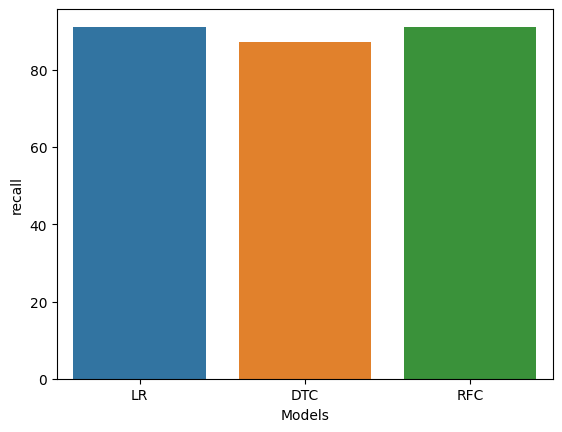

In [54]:
sns.barplot(x=final_data_undersampling['Models'],y=final_data_undersampling['recall'],)

In under-sampling we loose our valuable data points

2. Over-Sampling
  * SMOTE

In [58]:
# Original Data
x=df.drop('Class',axis=1)
y=df['Class']

In [59]:
print(x.shape)
print(y.shape)

(275663, 29)
(275663,)


In [60]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [61]:
x_res,y_res = smote.fit_resample(x,y)

In [62]:
# Dataset after oversampling
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [64]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred4=lr.predict(x_test)

In [66]:
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))
print(recall_score(y_test,y_pred4))

0.9452923434717831
0.9730178657653308
0.9436026147708328
0.9159136774357762


In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred5=dtc.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))
print(f1_score(y_test,y_pred5))

0.9984737817507904
0.9978573114706469
0.9984737540200228


In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred6=rfc.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred6))
print(precision_score(y_test,y_pred6))
print(f1_score(y_test,y_pred6))

0.9999120693596891
0.999824518302741
0.9999122514522385
